# Nearest Neighbors

Functions along with their documentation used in this notebook:

- [NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)
- [KDTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)
- [BallTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)
- [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [RadiusNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)
- [KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- [RadiusNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

`NearestNeighbors` implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: `BallTree`, `KDTree`, and a brute-force algorithm based on routines in `sklearn.metrics.pairwise`. The choice of neighbors search algorithm is controlled through the keyword `algorithm`, which must be one of `['auto', 'ball_tree', 'kd_tree', 'brute']`.

In [12]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Finding the Nearest Neighbors
Finding the nearest neighbors between two sets of data:

In [9]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = neighbors.NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.41421356]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.41421356]]


`indices` gives the list of the nearest `n_neighbors` to each point int the data set. Since, the two sets are equal, the first nearest neighbor to each point is the point itself with distance 0 as seen above.

It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [10]:
print(type(nbrs.kneighbors_graph(X)))
nbrs.kneighbors_graph(X).toarray()

<class 'scipy.sparse.csr.csr_matrix'>


array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

### KD Tree and Ball Tree
Alternatively, one can use the KDTree or BallTree classes directly to find nearest neighbors. This is the functionality wrapped by the NearestNeighbors class used above. The Ball Tree and KD Tree have the same interface.

In [11]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = neighbors.KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

## Classification using Nearest Neighbors

`scikit-learn` implements two different nearest neighbors classifiers: 
- `KNeighborsClassifier`: implements learning based on the k nearest neighbors of each query point. 
- `RadiusNeighborsClassifier`: implements learning based on the number of neighbors within a fixed radius $r$ of each training point. This method can be a better choice in cases where the data is not uniformly sampled.

Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the `weights` keyword.


#### KNN on iris dataset
This problem is also discussed [here](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) with a mesh plot showing boundaries of the three classes.

In [15]:
n_neighbors = 15
iris = datasets.load_iris()

# we only take the first two features
X = iris.data
y = iris.target

for wt in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=wt)
    clf.fit(X, y)

    pred = clf.predict(X)
    cmat = confusion_matrix(y, pred)
    accuracy = round(100*cmat.diagonal().sum()/cmat.sum())
    print(cmat)
    print("Accuracy on training set for", wt, "weights = ", accuracy, "%")

plt.show()

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Accuracy on training set for uniform weights =  99.0 %
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Accuracy on training set for distance weights =  100.0 %


## Regression using Nearest Neighbors

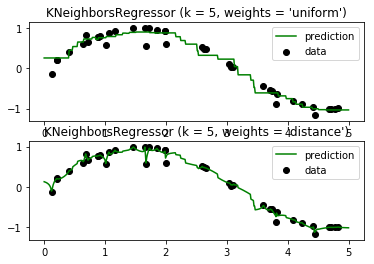

In [20]:
# Generate sample data
np.random.seed(2017-12-28)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()